In [ ]:
!pip install matplotlib numpy
import numpy as np
import matplotlib.pyplot as plt

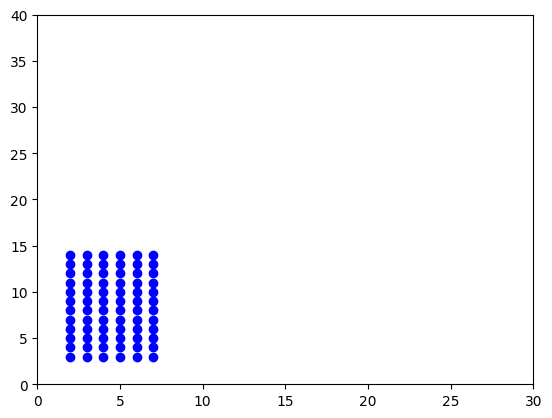

In [ ]:
def draw_quadrangle(X, Y, color='b', limX=[0, 30], limY=[0, 40]):
    plt.scatter(X, Y, color=color)
    plt.xlim(limX)
    plt.ylim(limY)
    plt.show()

f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()
draw_quadrangle(X, Y, limX=[0, 30], limY=[0, 40])


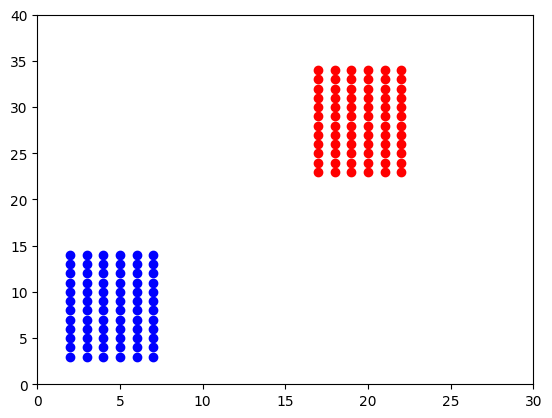

In [ ]:
def draw_quadrangle(X, Y, color='b', limX=[0, 30], limY=[0, 40]):
    plt.scatter(X, Y, color=color)
    plt.xlim(limX)
    plt.ylim(limY)

f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()

# Original points
draw_quadrangle(X, Y, color='b', limX=[0, 30], limY=[0, 40])

# Translated points
X_translated = X + 15
Y_translated = Y + 20
plt.scatter(X_translated, Y_translated, color='r')
plt.show()


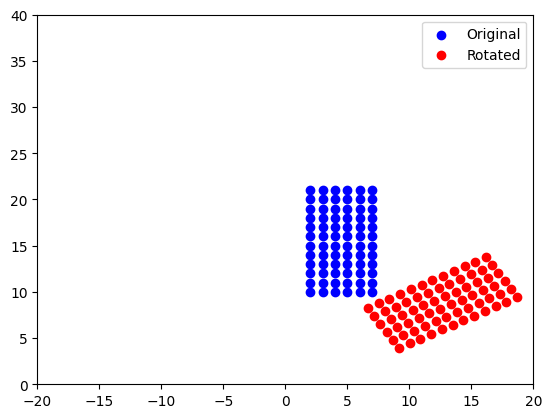

In [ ]:
def draw_quadrangle(X, Y, color='b', label=None):
    plt.scatter(X, Y, color=color, label=label)

def rotate_points(X, Y, theta_deg):
    theta_rad = np.radians(theta_deg)
    rotation_matrix = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                                [np.sin(theta_rad), np.cos(theta_rad)]])
    rotated_points = np.dot(np.vstack((X, Y)).T, rotation_matrix)
    return rotated_points[:, 0], rotated_points[:, 1]

# Create meshgrid with Y starting higher (e.g., starting at 10 instead of 3)
f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(10, 22))  # Adjusted Y values to start higher
X = f1.flatten()
Y = f2.flatten()

# Plot original points
draw_quadrangle(X, Y, color='b', label="Original")

# Rotate points by 60 degrees
X_rotated, Y_rotated = rotate_points(X, Y, theta_deg=60)

# Bring the red dots closer to the blue dots by applying a translation
X_rotated -= 3  # Shift to the left
Y_rotated += 5  # Shift upwards

# Plot rotated points
draw_quadrangle(X_rotated, Y_rotated, color='r', label="Rotated")

# Set the x and y axis limits
plt.xlim(-20, 20)
plt.ylim(0, 40)  # y-axis starts at 0

# Add labels and legend
plt.legend()

# Remove grid
plt.grid(False)

plt.show()


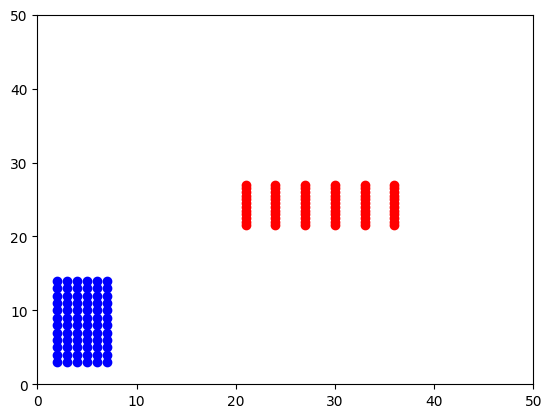

In [ ]:
def draw_quadrangle(X, Y, color='b', limX=[0, 50], limY=[0, 50]):
    plt.scatter(X, Y, color=color)
    plt.xlim(limX)
    plt.ylim(limY)

f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()

# Original points
draw_quadrangle(X, Y, color='b', limX=[0, 50], limY=[0, 50])

# Scaled and translated points
X_scaled_translated = X * 3 + 15
Y_scaled_translated = Y * 0.5 + 20
plt.scatter(X_scaled_translated, Y_scaled_translated, color='r')
plt.show()


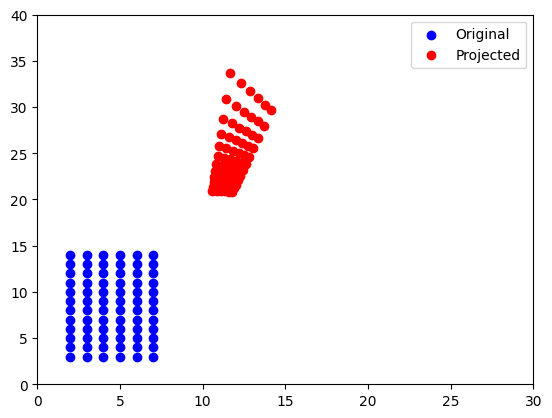

In [ ]:
def draw_quadrangle(X, Y, color='b', label=None):
    plt.scatter(X, Y, color=color, label=label)

def apply_projection(T, X, Y):
    points = np.vstack((X, Y, np.ones_like(X)))  # Convert to homogeneous coordinates
    projected_points = np.dot(T, points)  # Apply the projection matrix
    projected_points /= projected_points[2, :]  # Normalize by the third row (homogeneous)
    return projected_points[0, :], projected_points[1, :]  # Return projected X and Y

# Create meshgrid for the original points
f1, f2 = np.meshgrid(np.arange(2, 8), np.arange(3, 15))
X = f1.flatten()
Y = f2.flatten()

# Plot original points
draw_quadrangle(X, Y, color='b', label="Original")

# Define the projection matrix
T = np.array([[5, 5, 10],
              [5, 7, 70],
              [0.25, 0.5, 1]])  # Example projection matrix

# Apply the projection to the points
X_projected, Y_projected = apply_projection(T, X, Y)

# Plot projected points
draw_quadrangle(X_projected, Y_projected, color='r', label="Projected")

# Set axis limits to ensure everything is visible
plt.xlim(0, 30)
plt.ylim(0, 40)

# Add labels and legend
plt.legend()

# Show the plot
plt.show()


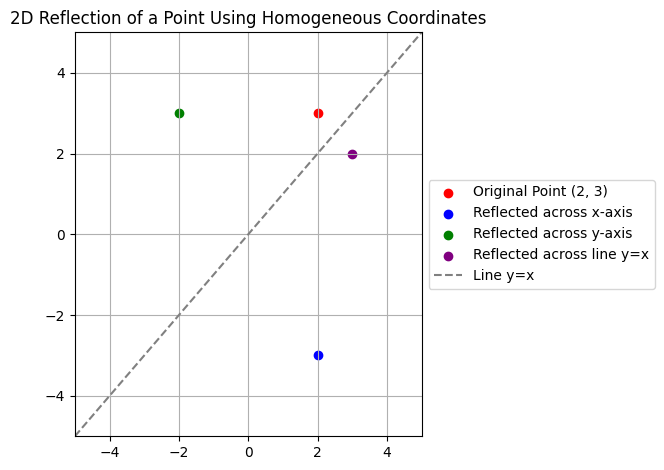

In [ ]:
# Function to reflect a point
def reflect_points(X, Y, reflection_matrix):
    reflected_points = np.dot(np.vstack((X, Y)).T, reflection_matrix)
    return reflected_points[:, 0], reflected_points[:, 1]

# Point P(2, 3)
X = np.array([2])
Y = np.array([3])

# Reflection matrices
reflection_x = np.array([[1, 0], [0, -1]])  # Reflection across x-axis
reflection_y = np.array([[-1, 0], [0, 1]])  # Reflection across y-axis
reflection_yx = np.array([[0, 1], [1, 0]])  # Reflection across line y = x

# Plot the original point
plt.scatter(X, Y, c='red', label='Original Point (2, 3)')
# Reflect across x-axis (blue in the example)
X_x, Y_x = reflect_points(X, Y, reflection_x)
plt.scatter(X_x, Y_x, c='blue', label='Reflected across x-axis')

# Reflect across y-axis (green in the example)
X_y, Y_y = reflect_points(X, Y, reflection_y)
plt.scatter(X_y, Y_y, c='green', label='Reflected across y-axis')

# Reflect across line y = x (purple in the example)
X_yx, Y_yx = reflect_points(X, Y, reflection_yx)
plt.scatter(X_yx, Y_yx, c='purple', label='Reflected across line y=x')

# Draw line y = x
x_vals = np.linspace(-5, 5, 100)
plt.plot(x_vals, x_vals, '--', color='gray', label='Line y=x')

# Set axis limits and labels
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title("2D Reflection of a Point Using Homogeneous Coordinates")

# Move the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

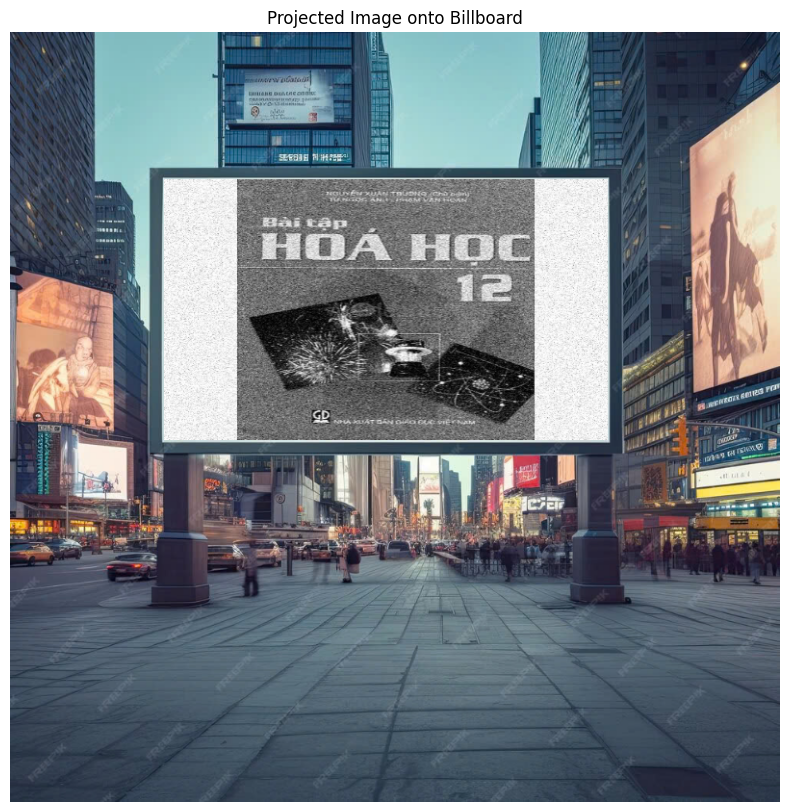

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the source and destination images
src_image_path = '/content/sample_data/noisy_image.jpg'
dst_image_path = '/content/sample_data/z5825845138544_55cd4977f39f170980617f4aef021ede.jpg'

# Read images
src_image = cv2.imread(src_image_path)
dst_image = cv2.imread(dst_image_path)


dst_image = cv2.resize(dst_image, (800, 800))

dst_points = np.array([[160, 153], [620, 153], [620, 423], [160, 423]], dtype='float32')


# Select the four corners of the source image
h, w = src_image.shape[:2]

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(src_points, dst_points)

# Warp the resized source image using the homography matrix
warped_image = cv2.warpPerspective(src_image_resized, homography_matrix, (dst_image.shape[1], dst_image.shape[0]))

# Create a mask from the warped image
mask = np.zeros_like(dst_image, dtype=np.uint8)
cv2.fillConvexPoly(mask, np.int32(dst_points), (255, 255, 255))

# Use the mask to blend the warped image into the destination image
masked_warped = cv2.bitwise_and(warped_image, mask)
masked_dst = cv2.bitwise_and(dst_image, cv2.bitwise_not(mask))
result_image = cv2.add(masked_warped, masked_dst)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Projected Image onto Billboard')
plt.axis('off')
plt.show()
